## Problem Statement 

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:
Need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [ ]:
import json 
import numpy as np
import pandas as pd
import spacy
#import en_core_web_sm
nlp = spacy.load('en_core_web_sm')
import re
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
sns.set_style('whitegrid')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint
from wordcloud import WordCloud, STOPWORDS
stop_words=set(STOPWORDS)
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
sns.set_style('whitegrid')

In [ ]:
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
!pip install swifter

     |████████████████████████████████| 280 kB 5.3 MB/s 
     |████████████████████████████████| 133 kB 56.9 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
import swifter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [ ]:
# Opening JSON file 
f = open('/content/drive/MyDrive/ColabFiles/NLP_Case_Study/complaints-2021-05-14_08_16_.json')# Write the path to your data file and load it 
  
# returns JSON object as  
# a dictionary 
data = json.load(f)
df=pd.json_normalize(data)
f.close()

## Data preparation

In [ ]:
# Inspect the dataframe to understand the given data.
pd.set_option('max_columns', None)
df.head()


,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [ ]:
#print the column names
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [ ]:
#Assign new column names
#remove '_' from column names
df.columns=[re.sub('^_', '', col) for col in df.columns]
print('coulmns after removing underscore: \n',df.columns)

coulmns after removing underscore: 
 Index(['index', 'type', 'id', 'score', 'source.tags', 'source.zip_code',
       'source.complaint_id', 'source.issue', 'source.date_received',
       'source.state', 'source.consumer_disputed', 'source.product',
       'source.company_response', 'source.company', 'source.submitted_via',
       'source.date_sent_to_company', 'source.company_public_response',
       'source.sub_product', 'source.timely', 'source.complaint_what_happened',
       'source.sub_issue', 'source.consumer_consent_provided'],
      dtype='object')


In [ ]:
#remove 'source.' from column names
df.columns=[col.replace("source.","") for col in df.columns]
print(df.columns)

Index(['index', 'type', 'id', 'score', 'tags', 'zip_code', 'complaint_id',
       'issue', 'date_received', 'state', 'consumer_disputed', 'product',
       'company_response', 'company', 'submitted_via', 'date_sent_to_company',
       'company_public_response', 'sub_product', 'timely',
       'complaint_what_happened', 'sub_issue', 'consumer_consent_provided'],
      dtype='object')


In [ ]:
df.head()

,index,type,id,score,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [ ]:
#Assign nan in place of blanks in the complaints column
df['complaint_what_happened'].replace("", np.nan, inplace=True)

In [ ]:
df.head()

,index,type,id,score,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,NaN,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,NaN,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,NaN,Charged too much interest,N/A


In [ ]:
print(df.isnull().sum())

index                            0
type                             0
id                               0
score                            0
tags                         67413
zip_code                      6757
complaint_id                     0
issue                            0
date_received                    0
state                         1991
consumer_disputed                0
product                          0
company_response                 0
company                          0
submitted_via                    0
date_sent_to_company             0
company_public_response      78309
sub_product                  10571
timely                           0
complaint_what_happened      57241
sub_issue                    46297
consumer_consent_provided     1008
dtype: int64


In [ ]:
#Remove all rows where complaints column is nan
df=df.dropna(subset=['complaint_what_happened'])

In [ ]:
print(df.isnull().sum())

index                            0
type                             0
id                               0
score                            0
tags                         17256
zip_code                      4645
complaint_id                     0
issue                            0
date_received                    0
state                          143
consumer_disputed                0
product                          0
company_response                 0
company                          0
submitted_via                    0
date_sent_to_company             0
company_public_response      21070
sub_product                   2109
timely                           0
complaint_what_happened          0
sub_issue                     8176
consumer_consent_provided        0
dtype: int64


## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Use POS tags to get relevant words from the texts.


In [ ]:
# Write your function here to clean the text and remove all the unnecessary elements.
def clean_text(sentence):
  #lower case
  sentence=sentence.lower()

  #remove text inside square bracket


  # \[.*?\]

  # \[ matches the character [ with index 9110 (5B16 or 1338) literally (case sensitive)
  # . matches any character (except for line terminators)
  # *? matches the previous token between zero and unlimited times, as few times as possible, expanding as needed (lazy)
  # \] matches the character ] with index 9310 (5D16 or 1358) literally (case sensitive)
  sentence=re.sub(r"\[.*?\]","",sentence)


  #remove punctuations
  #  [^\w\s]
  # ^ suggest compliment
  # \w matches any word character (equivalent to [a-zA-Z0-9_])
  # \s matches any whitespace character (equivalent to [\r\n\t\f\v ])
  sentence=re.sub(r"[^\w\s]","",sentence)

  #remove words having number

  sentence=re.sub(r"\w*\d\w*","",sentence)

  return sentence


  

In [ ]:
#Write your function to Lemmatize the texts
#sw = stopwords.words('english')

def lemmatize_text(sentence):
  lemmatized_sentence = []
  #sentence_sw=' '.join([word for word in sentence if word not in stopwords.words('english')])
  doc=nlp(sentence)
  for tok in doc:
    lemmatized_sentence.append(tok.lemma_)
  
  return " ".join(lemmatized_sentence)



In [ ]:
t1=clean_text('Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.')

In [ ]:
lemmatize_text(t1)

'good morning -PRON- name be xxxx xxxx and i appreciate -PRON- if -PRON- could help -PRON- put a stop to chase bank cardmember service \n in   i write to chase ask for debt verification and what -PRON- send -PRON- a statement which be not acceptable i be ask the bank to validate the debt instead i be receive mail every month from -PRON- attempt to collect a debt \n i have a right to know this information as a consumer \n\n chase account   xxxx xxxx xxxx xxxx thank in advance for -PRON- help'

In [ ]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df['Clean_Complaint']=df['complaint_what_happened'].swifter.apply(clean_text)

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

In [ ]:
df['complaint_lemmatized']=df['Clean_Complaint'].swifter.apply(lemmatize_text)

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

In [ ]:
df_clean=df[['Clean_Complaint','complaint_lemmatized']]

In [ ]:
df_clean.rename(columns={'Clean_Complaint':'complaint_what_happened'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_clean.head()

,complaint_what_happened,complaint_lemmatized
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning -PRON- name be xxxx xxxx and i appreciate -PRON- if -PRON- could help -PRON- put a stop to chase bank cardmember service \n in i write to chase ask for debt verification and what -PRON- send -PRON- a statement which be not acceptable i be ask the bank to validate the debt instead i be receive mail every month from -PRON- attempt to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for -PRON- help
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,i upgrade -PRON- xxxx xxxx card in and be tell by the agent who do the upgrade -PRON- anniversary date would not change -PRON- turn the agent be give -PRON- the wrong information in order to upgrade the account xxxx change -PRON- anniversary date from xxxxxxxx to xxxxxxxx without -PRON- consent xxxx have the recording of the agent who be mislead -PRON-
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card be report on however fraudulent application have be submit -PRON- identity without -PRON- consent to fraudulently obtain service do not extend credit without verify the identity of the applicant
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,on while try to book a xxxx xxxx ticket i come across an offer for to be apply towards the ticket if i apply for a reward card i put in -PRON- information for the offer and within less than a minute be notify via the screen that a decision could not be make i immediately contact xxxx and be refer to chase bank i then immediately contact chase bank within no more than of get the notification on the screen and i be tell by the chase represent

In [ ]:
#Write your function to extract the POS tags 
def extract_pos_tag(sentence):
  pos_removed = []
  doc = nlp(sentence)
  for tok in doc:
    if (tok.pos_=="NOUN"):
      pos_removed.append(tok.lemma_.lower())

  return " ".join(pos_removed)
  

In [ ]:
text="good morning -PRON- name be xxxx xxxx and i appreciate -PRON- if -PRON- could help -PRON- put a stop to chase bank cardmember service \n in i write to chase ask for debt verification and what -PRON- send -PRON- a statement which be not acceptable i be ask the bank to validate the debt instead i be receive mail every month from -PRON- attempt to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for -PRON- help"

In [ ]:
type(extract_pos_tag(text))

str

In [ ]:
df_clean['complaint_POS_removed']=df_clean['complaint_lemmatized'].swifter.apply(extract_pos_tag)

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean.head()

,complaint_what_happened,complaint_lemmatized,complaint_POS_removed
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning -PRON- name be xxxx xxxx and i appreciate -PRON- if -PRON- could help -PRON- put a stop to chase bank cardmember service \n in i write to chase ask for debt verification and what -PRON- send -PRON- a statement which be not acceptable i be ask the bank to validate the debt instead i be receive mail every month from -PRON- attempt to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for -PRON- help,morning name stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account advance help
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,i upgrade -PRON- xxxx xxxx card in and be tell by the agent who do the upgrade -PRON- anniversary date would not change -PRON- turn the agent be give -PRON- the wrong information in order to upgrade the account xxxx change -PRON- anniversary date from xxxxxxxx to xxxxxxxx without -PRON- consent xxxx have the recording of the agent who be mislead -PRON-,card agent anniversary date agent information order account change anniversary date consent xxxx recording agent
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card be report on however fraudulent application have be submit -PRON- identity without -PRON- consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,card report application submit identity consent service credit identity applicant
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,on while try to book a xxxx xxxx ticket i come across an offer for to be appl

In [ ]:
#Removing -PRON- from the text corpus
df_clean['complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [ ]:
df_clean['complaint_clean'] = df_clean['complaint_clean'].str.replace('xxxx','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_clean.head()

,complaint_what_happened,complaint_lemmatized,complaint_POS_removed,complaint_clean
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning -PRON- name be xxxx xxxx and i appreciate -PRON- if -PRON- could help -PRON- put a stop to chase bank cardmember service \n in i write to chase ask for debt verification and what -PRON- send -PRON- a statement which be not acceptable i be ask the bank to validate the debt instead i be receive mail every month from -PRON- attempt to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for -PRON- help,morning name stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account advance help,morning name stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account advance help
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,i upgrade -PRON- xxxx xxxx card in and be tell by the agent who do the upgrade -PRON- anniversary date would not change -PRON- turn the agent be give -PRON- the wrong information in order to upgrade the account xxxx change -PRON- anniversary date from xxxxxxxx to xxxxxxxx without -PRON- consent xxxx have the recording of the agent who be mislead -PRON-,card agent anniversary date agent information order account change anniversary date consent xxxx recording agent,card agent anniversary date agent information order account change anniversary date consent recording agent
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card be report on however fraudulent application have be submit -PRON- identity without -PRON- consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,card report application submit identity consent service credit identity applicant,card report application submit identity consent service credit identity applicant
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase di

## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




In [ ]:
# Write your code here to visualise the data according to the 'Complaint' character length
complaint_length=sorted([len(word) for word in df_clean['complaint_clean']],reverse=True)
complaint_length[0:10]

[12289, 11991, 10334, 9782, 8976, 8573, 8525, 7792, 6858, 6395]

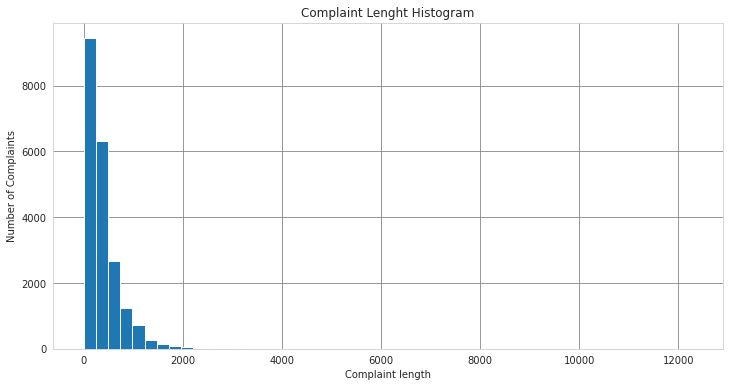

In [ ]:
# Plot the data according to character length of complaints
plt.figure(figsize=(12,6))
plt.hist(complaint_length,bins = 50)
plt.title('Complaint Lenght Histogram')
plt.ylabel('Number of Complaints')
plt.xlabel('Complaint length')
plt.grid(color='grey')
plt.show()

#### Find the top 40 words by frequency among all the articles after processing the text.

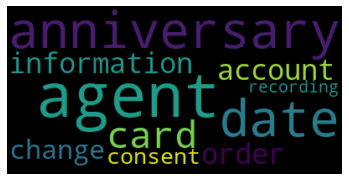

In [ ]:
# Start with one review:
text = df_clean.complaint_clean[2]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

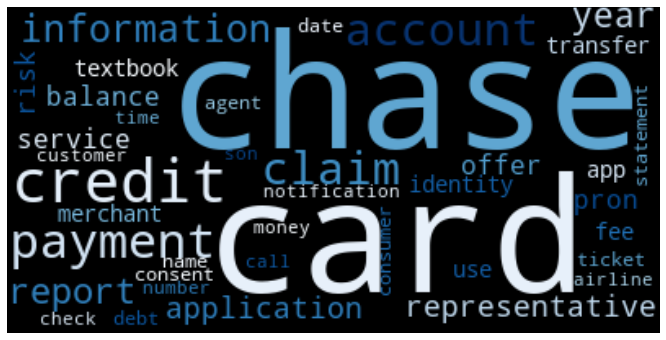

In [ ]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
text=str(df_clean.complaint_clean)
wordcloud = WordCloud(stopwords=stop_words,colormap='Blues', max_words=40,random_state=50).generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [ ]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
#get corpus
corpus=df_clean.complaint_clean.values
#countvectorizer
vec = CountVectorizer(stop_words='english').fit(corpus)
#create bag of words
bag_of_words = vec.transform(corpus)
#sum of word counts
sum_words = bag_of_words.sum(axis=0)

In [ ]:
#get feature names
feature_names=vec.get_feature_names()

In [ ]:
#empty list
results=[]
for word, idx in vec.vocabulary_.items():
    # get the feature name
    n_gram=feature_names[idx]
    # collect as a list of tuples having word, sum 
    results.append((n_gram,sum_words[0,idx]))

In [ ]:
#sort resultant list of tuple
results.sort(key = lambda x: x[1],reverse=True)

In [ ]:
#create df for top 30
unigram=pd.DataFrame(results[0:30],columns =['Word', 'Unigram_Count'])

In [ ]:
#Print the top 10 words in the unigram frequency
unigram.head(10)

,Word,Unigram_Count
0,account,45655
1,chase,40367
2,credit,32880
3,card,30189
4,pron,22970
5,payment,20824
6,charge,16119
7,bank,16109
8,time,16023
9,day,12854


In [ ]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
#get corpus
corpus=df_clean.complaint_clean.values
#countvectorizer
vec = CountVectorizer(ngram_range=(2, 2),stop_words='english').fit(corpus)
#create bag of words
bag_of_words = vec.transform(corpus)
#sum of word counts
sum_words = bag_of_words.sum(axis=0)

#get feature names
feature_names=vec.get_feature_names()

#empty list
results=[]
for word, idx in vec.vocabulary_.items():
    # get the feature name
    n_gram=feature_names[idx]
    # collect as a list of tuples having word, sum 
    results.append((n_gram,sum_words[0,idx]))

#sort resultant list of tuple
results.sort(key = lambda x: x[1],reverse=True)

#create df for top 30
Bigram=pd.DataFrame(results[0:30],columns =['Word', 'Bigram_Count'])

In [ ]:
#Print the top 10 words in the bigram frequency
Bigram.head(10)

,Word,Bigram_Count
0,credit card,12575
1,credit report,3908
2,customer service,2881
3,pron account,2683
4,chase credit,2440
5,account chase,2389
6,account account,2385
7,bank account,1938
8,debit card,1864
9,check account,1785


In [ ]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
#get corpus
corpus=df_clean.complaint_clean.values
#countvectorizer
vec = CountVectorizer(ngram_range=(3, 3),stop_words='english').fit(corpus)
#create bag of words
bag_of_words = vec.transform(corpus)
#sum of word counts
sum_words = bag_of_words.sum(axis=0)

#get feature names
feature_names=vec.get_feature_names()

#empty list
results=[]
for word, idx in vec.vocabulary_.items():
    # get the feature name
    n_gram=feature_names[idx]
    # collect as a list of tuples having word, sum 
    results.append((n_gram,sum_words[0,idx]))

#sort resultant list of tuple
results.sort(key = lambda x: x[1],reverse=True)

#create df for top 30
Trigram=pd.DataFrame(results[0:30],columns =['Word', 'Trigram_Count'])

In [ ]:
#Print the top 10 words in the trigram frequency
Trigram.head(10)

,Word,Trigram_Count
0,chase credit card,1722
1,credit card account,1091
2,credit card company,960
3,credit card chase,549
4,credit card credit,537
5,charge credit card,531
6,inquiry credit report,512
7,account credit card,439
8,card credit card,432
9,credit reporting agency,358


## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [ ]:
#Write your code here to initialise the TfidfVectorizer 
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [ ]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
doc_term_matrix = tfidf.fit_transform(df_clean.complaint_clean)

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [ ]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [ ]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5 #write the value you want to test out

#keep the random_state =40
nmf_model = NMF(n_components=num_topics,random_state=40)#write your code here

In [ ]:
nmf_model.fit(doc_term_matrix)
len(tfidf.get_feature_names())

6564

In [ ]:
H=nmf_model.components_  

In [ ]:
#Print the Top15 words for each of the topics
for i in range(num_topics):
    ix = H[i].argsort()[::-1][:15]
    print("Top 15 word for Topic {} are: \n ".format(i))
    print([tfidf.get_feature_names()[i] for i in ix])
    print('\n')


Top 15 word for Topic 0 are: 
 
['account', 'check', 'money', 'bank', 'fund', 'deposit', 'chase', 'pron', 'branch', 'day', 'number', 'transaction', 'business', 'transfer', 'claim']


Top 15 word for Topic 1 are: 
 
['credit', 'card', 'report', 'inquiry', 'chase', 'account', 'score', 'company', 'information', 'limit', 'debt', 'application', 'letter', 'year', 'balance']


Top 15 word for Topic 2 are: 
 
['loan', 'mortgage', 'modification', 'home', 'chase', 'property', 'year', 'letter', 'time', 'document', 'rate', 'pron', 'sale', 'house', 'foreclosure']


Top 15 word for Topic 3 are: 
 
['charge', 'card', 'fee', 'transaction', 'dispute', 'chase', 'merchant', 'purchase', 'claim', 'fraud', 'service', 'time', 'refund', 'statement', 'pron']


Top 15 word for Topic 4 are: 
 
['payment', 'balance', 'month', 'fee', 'statement', 'day', 'pay', 'time', 'date', 'auto', 'credit', 'chase', 'account', 'pron', 'year']




In [ ]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topics=nmf_model.transform(doc_term_matrix)
#get position of highest weighted value
topics.argmax(axis=1)


array([0, 1, 1, ..., 3, 4, 4])

In [ ]:
#Assign the best topic to each of the cmplaints in Topic Column

df_clean['Topic'] = topics.argmax(axis=1)#write your code to assign topics to each rows.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_clean.head()

,complaint_what_happened,complaint_lemmatized,complaint_POS_removed,complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning -PRON- name be xxxx xxxx and i appreciate -PRON- if -PRON- could help -PRON- put a stop to chase bank cardmember service \n in i write to chase ask for debt verification and what -PRON- send -PRON- a statement which be not acceptable i be ask the bank to validate the debt instead i be receive mail every month from -PRON- attempt to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for -PRON- help,morning name stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account advance help,morning name stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account advance help,0
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,i upgrade -PRON- xxxx xxxx card in and be tell by the agent who do the upgrade -PRON- anniversary date would not change -PRON- turn the agent be give -PRON- the wrong information in order to upgrade the account xxxx change -PRON- anniversary date from xxxxxxxx to xxxxxxxx without -PRON- consent xxxx have the recording of the agent who be mislead -PRON-,card agent anniversary date agent information order account change anniversary date consent xxxx recording agent,card agent anniversary date agent information order account change anniversary date consent recording agent,1
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card be report on however fraudulent application have be submit -PRON- identity without -PRON- consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,card report application submit identity consent service credit identity applicant,card report application submit identity consent service credit identity applicant,1
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representat

In [ ]:
#Print the first 5 Complaint for each of the Topics
df_clean_five=df_clean.groupby('Topic').head(5)
df_clean_five.sort_values('Topic')

,complaint_what_happened,complaint_lemmatized,complaint_POS_removed,complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning -PRON- name be xxxx xxxx and i appreciate -PRON- if -PRON- could help -PRON- put a stop to chase bank cardmember service \n in i write to chase ask for debt verification and what -PRON- send -PRON- a statement which be not acceptable i be ask the bank to validate the debt instead i be receive mail every month from -PRON- attempt to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for -PRON- help,morning name stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account advance help,morning name stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account advance help,0
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen check number xxxx claim number is xxxx with chase,-PRON- grand son give -PRON- check for i deposit -PRON- into -PRON- chase account after fund clear -PRON- chase bank close -PRON- account never pay -PRON- -PRON- money -PRON- say -PRON- need to speek with -PRON- grand son check be clear money be take by -PRON- chase bank refuse to pay -PRON- -PRON- money -PRON- grand son call chase time -PRON- tell -PRON- i should call not -PRON- to verify the check owner -PRON- be out the country most the time date happen check number xxxx claim number be xxxx with chase,son chase account fund account money say son check money -pron- money son call time check owner country time date check number xxxx claim number,son chase account fund account money say son check money -pron- money son call time check owner country time date check number claim number,0
17,with out notice jp morgan chase restricted my account by my debit card tuesday on thursday i went into a branch after being advised by a customer service representative that my account would actually be closed i went into the branch to see how i can remove the funds that are in there currently in as well as if my direct deposit from my place of employment would be returned the bank associate and the customer service representative assured me that the funds would post but they may take an additional business day that saturday i attempted to go inside of a branch yet again to retrieve my funds that actually did post on friday upon looking at my account i realize that the funds have been reversed and no longer were present on my current statement ive been called and i was told that it may take two business day stating tuesday xxxxxxxx would be the date that my funds would be available to withdraw from a bank teller only now chase is informing me that i will be mailed a check into the three business days to recover the funds that are owed to me and left in my account currently unfortunately this has put me in an additional financial bind do two fees from late rent late car payments etc i am not being a short or giving written notice that these things will actually occur so that i have peace of mind in fact chase has handled my situation grossly i even had a bank

#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [ ]:
#Create the dictionary of Topic names and Topics

Topic_names = {0:"Bank Account services",
               1:"Credit card or prepaid card", 
               2:"Others",
               3:"Theft/Dispute Reporting",
               4:"Mortgage/Loan" }
#Replace Topics with Topic Names
df_clean['Topic_Name'] = df_clean['Topic'].map(Topic_names)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_clean.head()

,complaint_what_happened,complaint_lemmatized,complaint_POS_removed,complaint_clean,Topic,Topic_Name
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning -PRON- name be xxxx xxxx and i appreciate -PRON- if -PRON- could help -PRON- put a stop to chase bank cardmember service \n in i write to chase ask for debt verification and what -PRON- send -PRON- a statement which be not acceptable i be ask the bank to validate the debt instead i be receive mail every month from -PRON- attempt to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for -PRON- help,morning name stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account advance help,morning name stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account advance help,0,Bank Account services
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,i upgrade -PRON- xxxx xxxx card in and be tell by the agent who do the upgrade -PRON- anniversary date would not change -PRON- turn the agent be give -PRON- the wrong information in order to upgrade the account xxxx change -PRON- anniversary date from xxxxxxxx to xxxxxxxx without -PRON- consent xxxx have the recording of the agent who be mislead -PRON-,card agent anniversary date agent information order account change anniversary date consent xxxx recording agent,card agent anniversary date agent information order account change anniversary date consent recording agent,1,Credit card or prepaid card
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card be report on however fraudulent application have be submit -PRON- identity without -PRON- consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,card report application submit identity consent service credit identity applicant,card report application submit identity consent service credit identity applicant,1,Credit card or prepaid card
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not

## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [ ]:
#Create the dictionary again of Topic names and Topics

# Topic_names = { "Bank Account services":0,
#                "Credit card or prepaid card":1,
#                "Others":2,
#                "Theft/Dispute Reporting":3,
#                "Mortgage/Loan":4} }
# #Replace Topics with Topic Names
# df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [ ]:
# df_clean

In [ ]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data=training_data = df_clean[["complaint_what_happened","Topic"]]

In [ ]:
training_data

,complaint_what_happened,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,0
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,1
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,1
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,1
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen check number xxxx claim number is xxxx with chase,0
...,...,...
78303,after being a chase card customer for well over a decade was offered multiple solicitations for acquiring new credit cards with chase all with bonus airline miles and hotel points was approved for all new cards with no annual fee for year after less than months with payment always paid as agreed chase closed all my cards one of my approved new cards was never activated but was sent to me\n\nchase has done harm to my credit has charged me an annual fee even though they cancelled my account failed to credit my points for both airlines and hotel failed to credit up to for xxxx enrollment and failed to credit airline charge as agreed upon,1
78309,on wednesday xxxxxxxx i called chas my xxxx xxxx visa credit card provider and asked how to make a claim under their purchase protection benefit on xxxxxxxx i purchased three high school textbooks for my xxxx year old daughter because she transferred to a new school all three books were damaged when a water bottle in her backpack broke the chase representative assured me th

In [ ]:
training_data['Topic'].value_counts()

0    5183
1    5065
3    4789
2    3800
4    2235
Name: Topic, dtype: int64

####Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [ ]:

#Write your code to get the Vector count
count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(training_data['complaint_what_happened'])

#Write your code here to transform the word vector to tf-idf

tfidf_transform = TfidfTransformer()
train_data_tfidf = tfidf_transform.fit_transform(train_counts)



### **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Performing Train-Test split
X_train, X_test, y_train, y_test = train_test_split(train_data_tfidf, training_data.Topic, test_size=0.3, random_state=50)

In [ ]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (14750, 33665)
y_train (14750,)
X_test (6322, 33665)
y_test (6322,)


You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [ ]:
# Write your code here to build any 3 models and evaluate them using the required metrics





## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
lr = LogisticRegression(solver='liblinear') #lib linear offers L1 and L2 regularization
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
#Display Accuracy,precision,recall,f1-score
clf_report = classification_report(y_test,y_pred_lr,target_names=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting","Mortgage/Loan"])
print('ACCURACY SCORE :', accuracy_score(y_test,y_pred_lr))
print(clf_report)

ACCURACY SCORE : 0.9063587472318887
                             precision    recall  f1-score   support

      Bank Account services       0.88      0.94      0.91      1558
Credit card or prepaid card       0.92      0.93      0.92      1536
                     Others       0.91      0.93      0.92      1129
    Theft/Dispute Reporting       0.90      0.88      0.89      1446
              Mortgage/Loan       0.96      0.80      0.87       653

                   accuracy                           0.91      6322
                  macro avg       0.91      0.89      0.90      6322
               weighted avg       0.91      0.91      0.91      6322



In [ ]:
from sklearn.model_selection import GridSearchCV

Scoring Parameters from Sklearn Documentation:

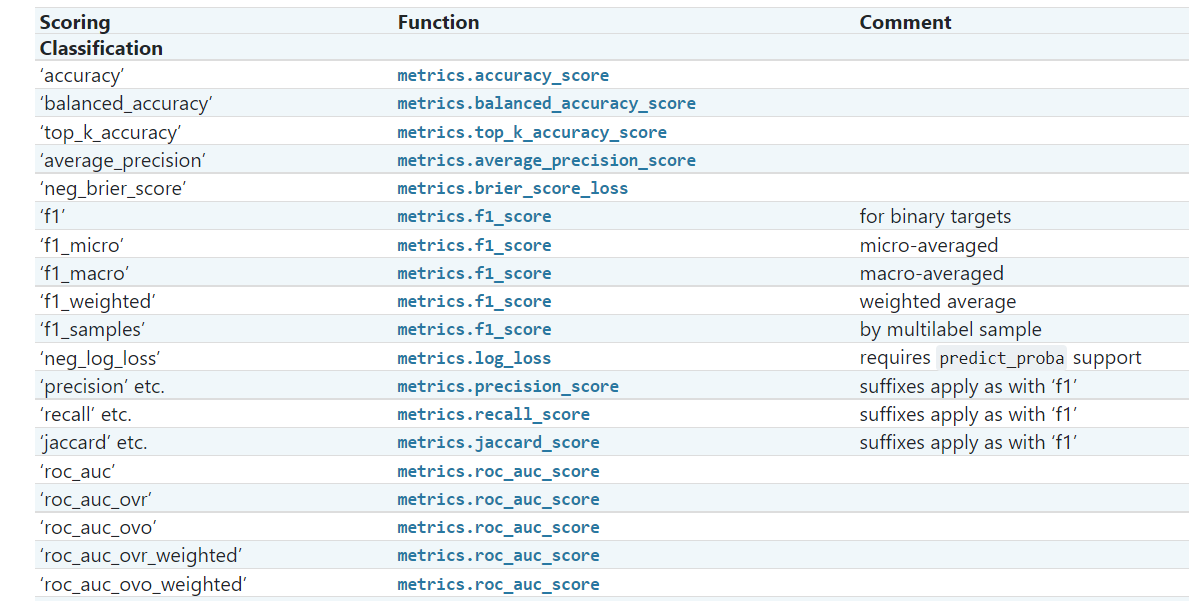

In [ ]:
# Hyperparameter tuning to improve performance


params_lr = {
    'C': [0.001,0.01,0.1,1,10,100],
    'solver':['lbfgs', 'liblinear','sag','saga']
}

grid_lr = GridSearchCV(estimator=lr,param_grid=params_lr,verbose=1,scoring='f1_weighted',n_jobs=-1,cv=5)
grid_lr.fit(X_train, y_train)

lr_best=grid_lr.best_params_
print(lr_best)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'C': 10, 'solver': 'lbfgs'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
#best estimator

lr_best_estimator=grid_lr.best_estimator_
print(lr_best_estimator)

LogisticRegression(C=10)


In [ ]:
#Display Accuracy,precision,recall,f1-score
clf_report_lr_best = classification_report(y_test,lr_best_estimator.predict(X_test),target_names=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting","Mortgage/Loan"])
print('ACCURACY SCORE :', accuracy_score(y_test,lr_best_estimator.predict(X_test)))
print(clf_report_lr_best)

ACCURACY SCORE : 0.9133185700727617
                             precision    recall  f1-score   support

      Bank Account services       0.91      0.92      0.91      1558
Credit card or prepaid card       0.92      0.92      0.92      1536
                     Others       0.92      0.94      0.93      1129
    Theft/Dispute Reporting       0.90      0.89      0.89      1446
              Mortgage/Loan       0.93      0.88      0.90       653

                   accuracy                           0.91      6322
                  macro avg       0.92      0.91      0.91      6322
               weighted avg       0.91      0.91      0.91      6322



## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt = DecisionTreeClassifier() 
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
#Display Accuracy,precision,recall,f1-score
clf_report_dt = classification_report(y_test,y_pred_dt,target_names=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting","Mortgage/Loan"])
print('ACCURACY SCORE :', accuracy_score(y_test,y_pred_dt))
print(clf_report_dt)

ACCURACY SCORE : 0.7793419803859538
                             precision    recall  f1-score   support

      Bank Account services       0.78      0.80      0.79      1558
Credit card or prepaid card       0.82      0.81      0.82      1536
                     Others       0.80      0.82      0.81      1129
    Theft/Dispute Reporting       0.74      0.71      0.73      1446
              Mortgage/Loan       0.71      0.72      0.72       653

                   accuracy                           0.78      6322
                  macro avg       0.77      0.77      0.77      6322
               weighted avg       0.78      0.78      0.78      6322



In [ ]:
# Hyperparameter tuning
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : [5, 15, 20, 30],
    'min_samples_leaf':[5,15, 25],
    
}

grid_search_dt = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "f1_weighted")

In [ ]:
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 15, 20, 30],
                         'min_samples_leaf': [5, 15, 25]},
             scoring='f1_weighted', verbose=1)

In [ ]:
grid_search_dt.best_estimator_

DecisionTreeClassifier(max_depth=30, min_samples_leaf=15)

In [ ]:
#best estimator
dt_best = grid_search_dt.best_estimator_
print(dt_best)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=15)


In [ ]:
#Display Accuracy,precision,recall,f1-score
clf_report_dt_best = classification_report(y_test,dt_best.predict(X_test),target_names=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting","Mortgage/Loan"])
print('ACCURACY SCORE :', accuracy_score(y_test,dt_best.predict(X_test)))
print(clf_report_dt_best)

ACCURACY SCORE : 0.7943688706105663
                             precision    recall  f1-score   support

      Bank Account services       0.79      0.82      0.80      1558
Credit card or prepaid card       0.82      0.82      0.82      1536
                     Others       0.82      0.82      0.82      1129
    Theft/Dispute Reporting       0.77      0.73      0.75      1446
              Mortgage/Loan       0.75      0.77      0.76       653

                   accuracy                           0.79      6322
                  macro avg       0.79      0.79      0.79      6322
               weighted avg       0.79      0.79      0.79      6322



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
#Display Accuracy,precision,recall,f1-score
clf_report_rf = classification_report(y_test,y_pred_rf,target_names=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting","Mortgage/Loan"])
print('ACCURACY SCORE :', accuracy_score(y_test,y_pred_rf))
print(clf_report_rf)

ACCURACY SCORE : 0.8203100284720025
                             precision    recall  f1-score   support

      Bank Account services       0.78      0.92      0.84      1558
Credit card or prepaid card       0.82      0.86      0.84      1536
                     Others       0.86      0.88      0.87      1129
    Theft/Dispute Reporting       0.82      0.81      0.82      1446
              Mortgage/Loan       0.93      0.41      0.56       653

                   accuracy                           0.82      6322
                  macro avg       0.84      0.78      0.79      6322
               weighted avg       0.83      0.82      0.81      6322



In [ ]:
# Hyperparameter tuning to improve Random Forest performance
params_rf = {
    'n_estimators': [20, 50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10],
    
}

grid_search_rf = GridSearchCV(estimator=rf,
                           param_grid=params_rf,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring='f1_weighted')

In [ ]:
grid_search_rf.fit(X_train, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [5, 10],
                         'n_estimators': [20, 50, 100, 200]},
             scoring='f1_weighted', verbose=1)

In [ ]:
#best estimator

rf_best = grid_search_rf.best_estimator_
print(rf_best)

RandomForestClassifier(class_weight='balanced', max_depth=30,
                       min_samples_split=10, n_estimators=200)


In [ ]:
#Display Accuracy,precision,recall,f1-score
clf_report_rf_best = classification_report(y_test,rf_best.predict(X_test),target_names=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting","Mortgage/Loan"])
print('ACCURACY SCORE :', accuracy_score(y_test,rf_best.predict(X_test)))
print(clf_report_rf_best)

ACCURACY SCORE : 0.8280607402720658
                             precision    recall  f1-score   support

      Bank Account services       0.82      0.88      0.85      1558
Credit card or prepaid card       0.81      0.85      0.83      1536
                     Others       0.86      0.88      0.87      1129
    Theft/Dispute Reporting       0.83      0.80      0.82      1446
              Mortgage/Loan       0.83      0.62      0.71       653

                   accuracy                           0.83      6322
                  macro avg       0.83      0.81      0.81      6322
               weighted avg       0.83      0.83      0.83      6322



# Naive Bias

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

y_pred_mnb = mnb.predict(X_test)


ACCURACY SCORE : 0.7144890857323631
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      1558
           1       0.82      0.86      0.84      1536
           2       0.86      0.88      0.87      1129
           3       0.82      0.81      0.82      1446
           4       0.93      0.41      0.56       653

    accuracy                           0.82      6322
   macro avg       0.84      0.78      0.79      6322
weighted avg       0.83      0.82      0.81      6322



In [ ]:
#Display Accuracy,precision,recall,f1-score
clf_report_mnb = classification_report(y_test,y_pred_mnb,target_names=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting","Mortgage/Loan"])
print('ACCURACY SCORE :', accuracy_score(y_test,y_pred_mnb))
print(clf_report_rf)

ACCURACY SCORE : 0.7144890857323631
                             precision    recall  f1-score   support

      Bank Account services       0.78      0.92      0.84      1558
Credit card or prepaid card       0.82      0.86      0.84      1536
                     Others       0.86      0.88      0.87      1129
    Theft/Dispute Reporting       0.82      0.81      0.82      1446
              Mortgage/Loan       0.93      0.41      0.56       653

                   accuracy                           0.82      6322
                  macro avg       0.84      0.78      0.79      6322
               weighted avg       0.83      0.82      0.81      6322



In [ ]:
# Hyperparameter tuning to improve performance
params_nb = {
    'alpha': (1, 0.1, 0.01, 0.001, 0.0001),
    'fit_prior':[True, False]
}

grid_search_mnb = GridSearchCV(estimator=mnb,
                           param_grid=params_nb,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring='f1_weighted')

In [ ]:
grid_search_mnb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': (1, 0.1, 0.01, 0.001, 0.0001),
                         'fit_prior': [True, False]},
             scoring='f1_weighted', verbose=1)

In [ ]:
#best estimator
mnb_best = grid_search_mnb.best_estimator_
print(mnb_best)

MultinomialNB(alpha=0.1, fit_prior=False)


In [ ]:
#Display Accuracy,precision,recall,f1-score
clf_report_mnb_best = classification_report(y_test,mnb_best.predict(X_test),target_names=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting","Mortgage/Loan"])
print('ACCURACY SCORE :', accuracy_score(y_test,mnb_best.predict(X_test)))
print(clf_report_mnb_best)

ACCURACY SCORE : 0.7731730465042708
                             precision    recall  f1-score   support

      Bank Account services       0.76      0.83      0.80      1558
Credit card or prepaid card       0.81      0.76      0.78      1536
                     Others       0.81      0.82      0.82      1129
    Theft/Dispute Reporting       0.76      0.78      0.77      1446
              Mortgage/Loan       0.67      0.57      0.61       653

                   accuracy                           0.77      6322
                  macro avg       0.76      0.75      0.76      6322
               weighted avg       0.77      0.77      0.77      6322

